In [8]:
%matplotlib inline 
import matplotlib.pylab
%pylab inline
pylab.rcParams['figure.figsize']=(10,6)
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## The special thing about time series is that data points is relate to one another...they are not independent
So we can compare them and relate them.  One way to do this is to look at how they change.  For example we can difference a time series.

In [18]:
ts=pd.Series(np.random.randn(20), pd.date_range('7/1/2016', freq='H', periods=20))
ts_lagged=ts.shift(5)  # you can use -5 too to move back 5 hrs

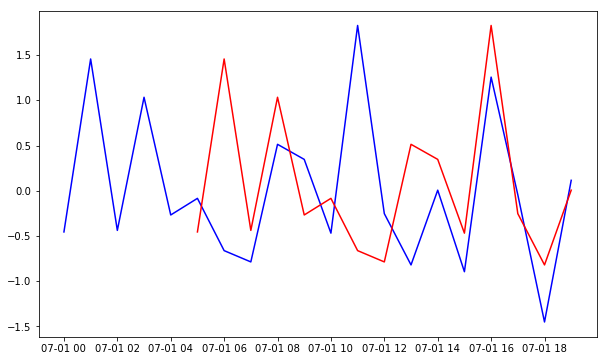

In [19]:
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='red')

In [ ]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [25]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.index

DatetimeIndex(['2016-07-01 00:00:00', '2016-07-01 00:00:01',
               '2016-07-01 00:00:02', '2016-07-01 00:00:03',
               '2016-07-01 00:00:04', '2016-07-01 00:00:05',
               '2016-07-01 00:00:06', '2016-07-01 00:00:07',
               '2016-07-01 00:00:08', '2016-07-01 00:00:09',
               ...
               '2016-07-01 00:09:50', '2016-07-01 00:09:51',
               '2016-07-01 00:09:52', '2016-07-01 00:09:53',
               '2016-07-01 00:09:54', '2016-07-01 00:09:55',
               '2016-07-01 00:09:56', '2016-07-01 00:09:57',
               '2016-07-01 00:09:58', '2016-07-01 00:09:59'],
              dtype='datetime64[ns]', length=600, freq='S')

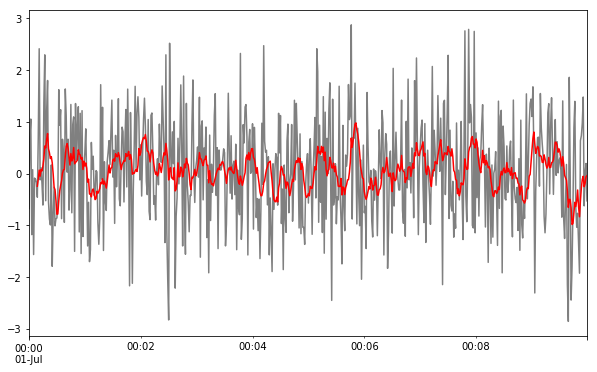

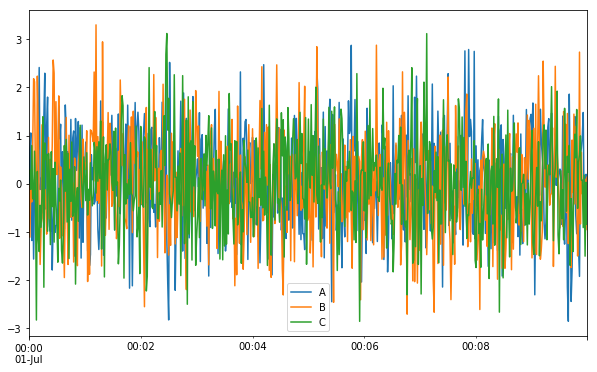

In [27]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df['A'].plot(color='gray')
r.mean()['A'].plot(color='red')
#df.plot(style = 'k--')
#r.mean().plot(style = 'k')
df.plot()

In [28]:
df.index

DatetimeIndex(['2016-07-01 00:00:00', '2016-07-01 00:00:01',
               '2016-07-01 00:00:02', '2016-07-01 00:00:03',
               '2016-07-01 00:00:04', '2016-07-01 00:00:05',
               '2016-07-01 00:00:06', '2016-07-01 00:00:07',
               '2016-07-01 00:00:08', '2016-07-01 00:00:09',
               ...
               '2016-07-01 00:09:50', '2016-07-01 00:09:51',
               '2016-07-01 00:09:52', '2016-07-01 00:09:53',
               '2016-07-01 00:09:54', '2016-07-01 00:09:55',
               '2016-07-01 00:09:56', '2016-07-01 00:09:57',
               '2016-07-01 00:09:58', '2016-07-01 00:09:59'],
              dtype='datetime64[ns]', length=600, freq='S')

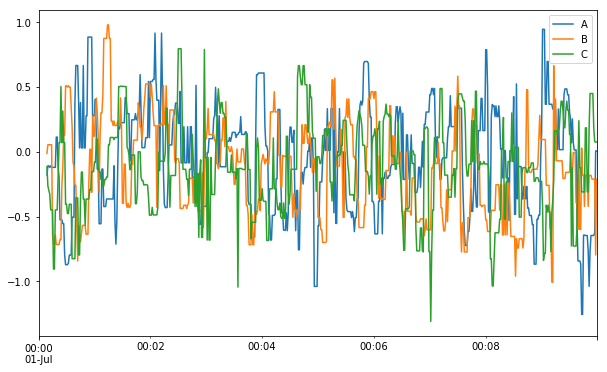

In [35]:
r.quantile(0.5).plot()

In [38]:
r.agg(['mean', 'var', 'sum'])

A                             B            \
                         mean       var       sum      mean       var   
2016-07-01 00:00:00       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:00:01       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:00:02       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:00:03       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:00:04       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:00:05       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:00:06       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:00:07       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:00:08       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:00:09 -0.243036  0.617315 -2.430363  0.455856  1.717402   
2016-07-01 00:00:10 -0.104875  0.675675 -1.048745  0.573434  1.733128   
2016-07-01 00:00:11  0.067484  1.277048  0.674839  0.620203  1.579994   
2016-07-01 00:00:12 -0.050021  1.157413 -0.500212  0.461040  2.082792   
2016-07-01 00:00:13  0.079211  1.000042  0.792110  0.402668  2.225632   
2016-07-01 00:00:14  0.051926  1.007690  0.519260  0.451539  2.285593   
2016-07-01 00:00:15  0.147561  0.755665  1.475611  0.161955  2.011187   
2016-07-01 00:00:16  0.292704  0.890725  2.927039 -0.133605  1.601231   
2016-07-01 00:00:17  0.533106  1.253987  5.331056 -0.150885  1.597030   
2016-07-01 00:00:18  0.498629  1.320468  4.986287 -0.059213  1.472371   
2016-07-01 00:00:19  0.665071  1.244309  6.650707 -0.387293  0.876598   
2016-07-01 00:00:20  0.774273  1.373720  7.742731 -0.571271  0.581369   
2016-07-01 00:00:21  0.477490  1.173630  4.774904 -0.410711  0.813658   
2016-07-01 00:00:22  0.401601  1.332093  4.016008 -0.315782  0.636697   
2016-07-01 00:00:23  0.291057  1.525245  2.910569 -0.168879  0.641813   
2016-07-01 00:00:24  0.327472  1.499012  3.274716 -0.278602  0.422684   
2016-07-01 00:00:25  0.209039  1.885464  2.090386 -0.128926  0.501641   
2016-07-01 00:00:26 -0.007071  1.797554 -0.070713  0.211954  1.125400   
2016-07-01 00:00:27 -0.262868  1.143353 -2.628678  0.453673  1.531784   
2016-07-01 00:00:28 -0.311430  1.195141 -3.114295  0.471055  1.507293   
2016-07-01 00:00:29 -0.519339  0.925324 -5.193389  0.746106  1.336272   
...                       ...       ...       ...       ...       ...   
2016-07-01 00:09:30  0.418499  0.290670  4.184991  0.120631  1.299184   
2016-07-01 00:09:31  0.278676  0.160606  2.786764  0.140730  1.288603   
2016-07-01 00:09:32  0.146107  0.275848  1.461070 -0.038186  1.202809   
2016-07-01 00:09:33  0.326756  0.382277  3.267558  0.045601  0.960208   
2016-07-01 00:09:34  0.196389  0.519826  1.963890  0.211568  1.160290   
2016-07-01 00:09:35 -0.033482  0.614817 -0.334818 -0.001795  0.559688   
2016-07-01 00:09:36 -0.082842  0.639246 -0.828420  0.108346  0.714979   
2016-07-01 00:09:37 -0.126825  0.590237 -1.268249 -0.020573  0.714426   
2016-07-01 00:09:38 -0.342678  0.988659 -3.426784  0.107872  0.935029   
2016-07-01 00:09:39 -0.653492  1.543784 -6.534918  0.023110  1.101542   
2016-07-01 00:09:40 -0.497857  2.117252 -4.978565  0.117600  0.993393   
2016-07-01 00:09:41 -0.501699  2.112567 -5.016992  0.037983  1.078598   
2016-07-01 00:09:42 -0.661932  2.490354 -6.619315 -0.073260  1.366865   
2016-07-01 00:09:43 -0.983070  2.046754 -9.830704  0.105397  1.365634   
2016-07-01 00:09:44 -0.960815  2.057544 -9.608153 -0.062900  1.126957   
2016-07-01 00:09:45 -0.747096  2.375128 -7.470961  0.051113  1.350104   
2016-07-01 00:09:46 -0.554710  2.839056 -5.547103 -0.114896  1.187674   
2016-07-01 00:09:47 -0.636973  2.773024 -6.369727  0.063884  1.315057   
2016-07-01 00:09:48 -0.526288  2.524702 -5.262875 -0.099341  1.075534   
2016-07-01 00:09:49 -0.317377  1.879640 -3.173767 -0.125229  1.147992   
2016-07-01 00:09:50 -0.639346  1.357956 -6.393458 -0.207563  1.187791   
2016-07-01 00:09:51 -0.834772  1.449343 -8.347723  0.145955  1.970655   
2016-07-01 00

In [4]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\pamel\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,-0.621522,-0.285183,-0.085746
2016-07-01 00:00:02,-0.653428,-0.070529,-0.833250
2016-07-01 00:00:03,-0.751925,-0.353174,-0.467189
2016-07-01 00:00:04,-0.787358,-0.303073,-0.275133
2016-07-01 00:00:05,-0.719494,-0.150464,-0.293194
2016-07-01 00:00:06,-0.612036,0.216054,0.130579
2016-07-01 00:00:07,-0.205705,0.363181,0.072272
2016-07-01 00:00:08,-0.091508,0.167650,0.233437
2016-07-01 00:00:09,-0.062565,0.295630,0.071416


In [39]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [40]:
df.head()

,A,B,C,D
2016-06-06,0.948660,-0.119255,0.135936,-0.640896
2016-06-07,-2.780773,-1.255283,1.267160,-0.728838
2016-06-08,1.307781,-0.405746,-1.344770,0.408534
2016-06-09,3.734890,0.214699,0.649403,1.032076
2016-06-10,0.625857,2.629862,0.168251,0.786302


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BD9501400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021BD965BDD8>], dtype=object)

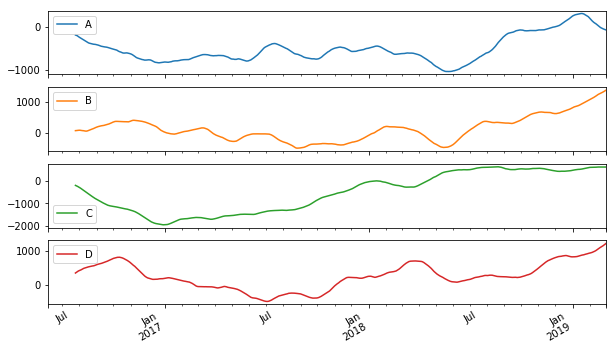

In [41]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [44]:
# What about a custom function?
df.rolling(window = 10, center=True).apply(lambda x: x[1]/x[2])[1:10]

,A,B,C,D
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,3.494185,0.772089,24.055730,1.425025
2016-06-12,-0.163315,1.137137,0.082414,-13.561489
2016-06-13,0.836864,-1.471030,0.807928,0.082686
2016-06-14,1.589421,0.730807,0.921060,0.737968
2016-06-15,0.695002,0.627782,0.580198,0.402825


## What if I want to generate a rolling window function of monthly data from daily data?

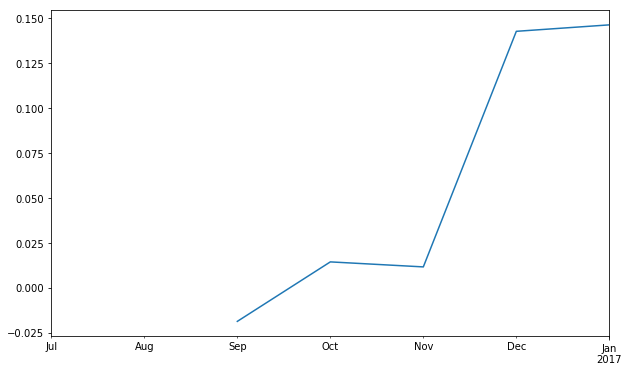

In [45]:
ts_long=pd.Series(np.random.randn(200), pd.date_range('7/1/16', freq='D', periods=200))
ts_long.resample('M').mean().rolling(window=3).mean().plot()

In [46]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.441726,-0.746896,0.769516,-1.005314
2016-06-08,-0.469261,-1.091359,0.532453,-0.990609
2016-06-09,0.450693,-1.209915,0.576272,-0.725238
2016-06-10,1.127838,-0.755077,0.636214,-0.408754


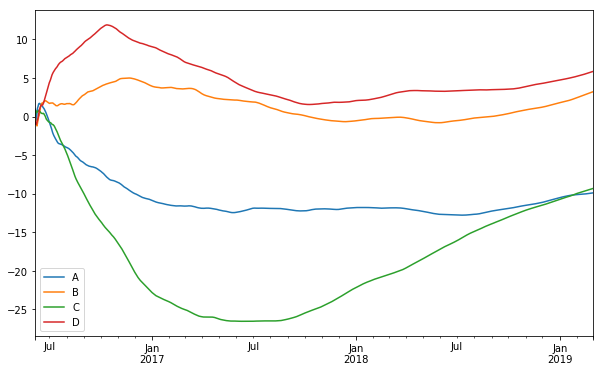

In [47]:
df.expanding(min_periods = 1).mean().plot()

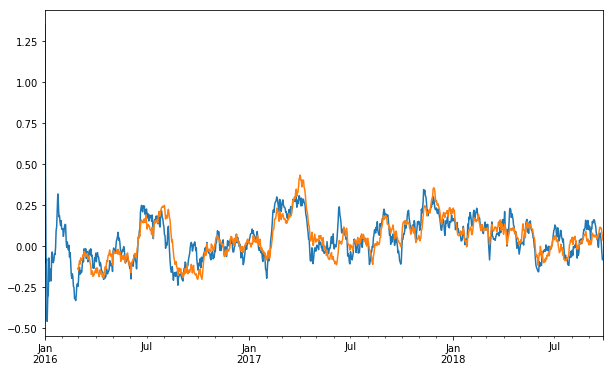

In [58]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?
ts=pd.Series(np.random.randn(1000), index=pd.date_range('1/1/16', freq='D', periods=1000))
ts.ewm(span=60, freq='D', min_periods=0, adjust=True).mean().plot()
ts.rolling(window=60).mean().plot()

In [ ]:
# EWMA
# Why use EWMA?

In [59]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

r=df.rolling(window=20)
r.apply(lambda x: sorted(x)[round(len(x)*0.5)])

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,NaN,NaN,NaN,NaN


In [60]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting
r=df.rolling(window=20)
r.agg(['sum','count']).head()

A         B         C         D      
           sum count sum count sum count sum count
2016-06-06 NaN   1.0 NaN   1.0 NaN   1.0 NaN   1.0
2016-06-07 NaN   2.0 NaN   2.0 NaN   2.0 NaN   2.0
2016-06-08 NaN   3.0 NaN   3.0 NaN   3.0 NaN   3.0
2016-06-09 NaN   4.0 NaN   4.0 NaN   4.0 NaN   4.0
2016-06-10 NaN   5.0 NaN   5.0 NaN   5.0 NaN   5.0